<a href="https://colab.research.google.com/github/rajigottipati/Data-Engineer-Project/blob/master/Business_Insights_%26_Reporting_Platform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading the Data**

In [ ]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_path = "/content/drive/MyDrive/Business Insights Project/"
raw_contacts_2021 = pd.read_excel(base_path + "List 21.xlsx")
raw_contacts_2022 = pd.read_excel(base_path + "List 22.xlsx")
raw_contacts_latest = pd.read_excel(base_path + "list new.xlsx")


# View Raw Data

In [ ]:
raw_contacts_2021

,Name,Company,Email,Unnamed: 3
0,surjeetm,eksource,surjeetm@eksource.com,508 332 2910
1,RELDER,KFORCE,RELDER@KFORCE.COM,508 612 6295
2,BDEMPSEY,KFORCE,BDEMPSEY@KFORCE.COM,469 647 9681
3,abhishek,infiCareTech,abhishek@infiCareTech.com,317 675 9753
4,srao,tekshapers,srao@tekshapers.com,508 308 2395
...,...,...,...,...
2812,jordancbit,gmail,jordancbit@gmail.com,510 220 9486
2813,cshrader,teksystems,cshrader@teksystems.com,408 462 1586
2814,mposey,teksystems,mposey@teksystems.com,510 282 7796
2815,jpelt,teksystem,jpelt@teksystem.com,951 390 8103


In [ ]:
raw_contacts_2022

,Amit.Kumar,calance,Amit.Kumar@calance.com,646 808 9706
0,andy,tekfortune,andy@tekfortune.com,914 309 9834
1,ankitp,enterprisesolutioninc,ankitp@enterprisesolutioninc.com,917 335 6835
2,ashish.gupta,idctechnologies,ashish.gupta@idctechnologies.com,914 960 6489
3,brian,perfres,brian@perfres.com,347 531 6481
4,deepak.p,usgrpinc,deepak.p@usgrpinc.com,646 431 5575
...,...,...,...,...
16475,ztopping,teksystems,ztopping@teksystems.com,501 777 5982
16476,zubair,enterprisesolutioninc,zubair@enterprisesolutioninc.com,678 978 0941 678 978 0941
16477,zubia,sohosquaresolutions,zubia@sohosquaresolutions.com,731 549 5990
16478,zulfi,resource-logistics,zulfi@resource-logistics.com,831 461 1557 831 600 6569


In [ ]:
raw_contacts_latest

,Subramaniyam T,Krgtech,(214) 446-0247,Subramaniyam@krgtech.com
0,Chaitanya Nallagonda,Bcforward,(317) 315-8924,Chaitanya.Nallagonda@bcforward.com
1,Narendra Erugu,Speridian,(505)-715-6659,narendra.erugu@speridian.com
2,Kirti Pal,Intellyk,(732) 627-1446,Kirti.b@intellyk.com
3,Karthik Arjun,Deegit Inc,(847) 440 2436,arjun@deegit.com
4,Solomon Keith,Tridentconsultinginc,(925) 231-0035,solomon@tridentconsultinginc.com
...,...,...,...,...
17505,Zuber Khan,Ztek,617 299 0004,zuber@ztek-inc.com
17506,Zubia,Sohosquaresolutions,443 695 1418,zubia@sohosquaresolutions.com
17507,zubin,panzersols,646 543 0199,zubin@panzersols.com
17508,Zulfequar Jafree,NaN,646 258 7175,ali@vitsus.com


# Clean Data

In [ ]:
import numpy as np
import pandas as pd

def clean_and_standardize(df):
    # Make a copy to avoid modifying original dataframe and potential SettingWithCopyWarning
    df = df.copy()

    # Identify if headers are data (e.g., contains '@' or digits)
    # This addresses raw_contacts_2022 and raw_contacts_latest where first row is header
    headers_are_data = False
    if any(isinstance(col, str) and ("@" in col or any(char.isdigit() for char in col.strip())) for col in df.columns):
        headers_are_data = True

    if headers_are_data:
        # Assign standard columns based on available count
        # If there are fewer than 4 columns, take as many as available
        standard_names = ["Name", "Company", "Email", "Phone"]
        df.columns = standard_names[:len(df.columns)]

        # Ensure all 4 standard columns exist, adding missing ones with NaN
        for col_name in standard_names:
            if col_name not in df.columns:
                df[col_name] = np.nan
        df = df[standard_names] # Ensure correct order and only target columns

    else:
        # This branch handles cases like raw_contacts_2021 where headers are mostly good
        # but 'Unnamed: 3' needs special handling (it's the Phone column)
        if 'Unnamed: 3' in df.columns:
            df.rename(columns={'Unnamed: 3': 'Phone'}, inplace=True)

        # Remove any other genuinely unnamed columns (e.g., 'Unnamed: 0', 'Unnamed: 1', etc.)
        df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

        # Now, ensure the dataframe has the 4 standard columns (Name, Company, Email, Phone)
        # If any are missing after cleaning, add them with NaN values.
        standard_cols = ["Name", "Company", "Email", "Phone"]
        for col_name in standard_cols:
            if col_name not in df.columns:
                df[col_name] = np.nan

        # Reorder and select only the standard columns, dropping any extra ones
        df = df[standard_cols]

    # Trim whitespace for all columns
    for col in df.columns:
        df[col] = df[col].astype(str).str.strip()

    # Replace string 'nan' with actual NaN
    df.replace("nan", np.nan, inplace=True)

    return df

In [ ]:
clean_contacts_21 = clean_and_standardize(raw_contacts_2021)
clean_contacts_22 = clean_and_standardize(raw_contacts_2022)
clean_contacts_latest = clean_and_standardize(raw_contacts_latest)

In [ ]:
clean_contacts_21

,Name,Company,Email,Phone
0,surjeetm,eksource,surjeetm@eksource.com,508 332 2910
1,RELDER,KFORCE,RELDER@KFORCE.COM,508 612 6295
2,BDEMPSEY,KFORCE,BDEMPSEY@KFORCE.COM,469 647 9681
3,abhishek,infiCareTech,abhishek@infiCareTech.com,317 675 9753
4,srao,tekshapers,srao@tekshapers.com,508 308 2395
...,...,...,...,...
2812,jordancbit,gmail,jordancbit@gmail.com,510 220 9486
2813,cshrader,teksystems,cshrader@teksystems.com,408 462 1586
2814,mposey,teksystems,mposey@teksystems.com,510 282 7796
2815,jpelt,teksystem,jpelt@teksystem.com,951 390 8103


In [ ]:
clean_contacts_22

,Name,Company,Email,Phone
0,andy,tekfortune,andy@tekfortune.com,914 309 9834
1,ankitp,enterprisesolutioninc,ankitp@enterprisesolutioninc.com,917 335 6835
2,ashish.gupta,idctechnologies,ashish.gupta@idctechnologies.com,914 960 6489
3,brian,perfres,brian@perfres.com,347 531 6481
4,deepak.p,usgrpinc,deepak.p@usgrpinc.com,646 431 5575
...,...,...,...,...
16475,ztopping,teksystems,ztopping@teksystems.com,501 777 5982
16476,zubair,enterprisesolutioninc,zubair@enterprisesolutioninc.com,678 978 0941 678 978 0941
16477,zubia,sohosquaresolutions,zubia@sohosquaresolutions.com,731 549 5990
16478,zulfi,resource-logistics,zulfi@resource-logistics.com,831 461 1557 831 600 6569


In [ ]:
clean_contacts_latest

,Name,Company,Email,Phone
0,Chaitanya Nallagonda,Bcforward,(317) 315-8924,Chaitanya.Nallagonda@bcforward.com
1,Narendra Erugu,Speridian,(505)-715-6659,narendra.erugu@speridian.com
2,Kirti Pal,Intellyk,(732) 627-1446,Kirti.b@intellyk.com
3,Karthik Arjun,Deegit Inc,(847) 440 2436,arjun@deegit.com
4,Solomon Keith,Tridentconsultinginc,(925) 231-0035,solomon@tridentconsultinginc.com
...,...,...,...,...
17505,Zuber Khan,Ztek,617 299 0004,zuber@ztek-inc.com
17506,Zubia,Sohosquaresolutions,443 695 1418,zubia@sohosquaresolutions.com
17507,zubin,panzersols,646 543 0199,zubin@panzersols.com
17508,Zulfequar Jafree,NaN,646 258 7175,ali@vitsus.com


In [ ]:
+# Create a copy of the latest dataset to avoid modifying the original
clean_contacts_latest_fixed = clean_contacts_latest.copy()

# Swap the values in 'Email' and 'Phone' columns so they match the headers
# We use .values to assign the data based on position, effectively swapping the contents
clean_contacts_latest_fixed[['Email', 'Phone']] = clean_contacts_latest_fixed[['Phone', 'Email']].values

# Combine all three datasets into 'cleaned_contacts'
cleaned_contacts = pd.concat([clean_contacts_21, clean_contacts_22, clean_contacts_latest_fixed], ignore_index=True)

# Display the shape and first few rows
print(f"Combined dataset shape: {cleaned_contacts.shape}")
cleaned_contacts.head()

Combined dataset shape: (36807, 4)


,Name,Company,Email,Phone
0,surjeetm,eksource,surjeetm@eksource.com,508 332 2910
1,RELDER,KFORCE,RELDER@KFORCE.COM,508 612 6295
2,BDEMPSEY,KFORCE,BDEMPSEY@KFORCE.COM,469 647 9681
3,abhishek,infiCareTech,abhishek@infiCareTech.com,317 675 9753
4,srao,tekshapers,srao@tekshapers.com,508 308 2395


In [ ]:
clean_contacts_latest_fixed

,Name,Company,Email,Phone
0,Chaitanya Nallagonda,Bcforward,Chaitanya.Nallagonda@bcforward.com,(317) 315-8924
1,Narendra Erugu,Speridian,narendra.erugu@speridian.com,(505)-715-6659
2,Kirti Pal,Intellyk,Kirti.b@intellyk.com,(732) 627-1446
3,Karthik Arjun,Deegit Inc,arjun@deegit.com,(847) 440 2436
4,Solomon Keith,Tridentconsultinginc,solomon@tridentconsultinginc.com,(925) 231-0035
...,...,...,...,...
17505,Zuber Khan,Ztek,zuber@ztek-inc.com,617 299 0004
17506,Zubia,Sohosquaresolutions,zubia@sohosquaresolutions.com,443 695 1418
17507,zubin,panzersols,zubin@panzersols.com,646 543 0199
17508,Zulfequar Jafree,NaN,ali@vitsus.com,646 258 7175


Duplicates removed from the merged DF

In [ ]:
print(f"Shape before removing duplicates: {cleaned_contacts.shape}")
cleaned_contacts.drop_duplicates(subset=['Email', 'Phone'], inplace=True)
print(f"Shape after removing duplicates: {cleaned_contacts.shape}")

Shape before removing duplicates: (36807, 4)
Shape after removing duplicates: (36793, 4)


### Data Visualization for `cleaned_contacts`

Let's start by visualizing the completeness of our data and then explore the company distribution.

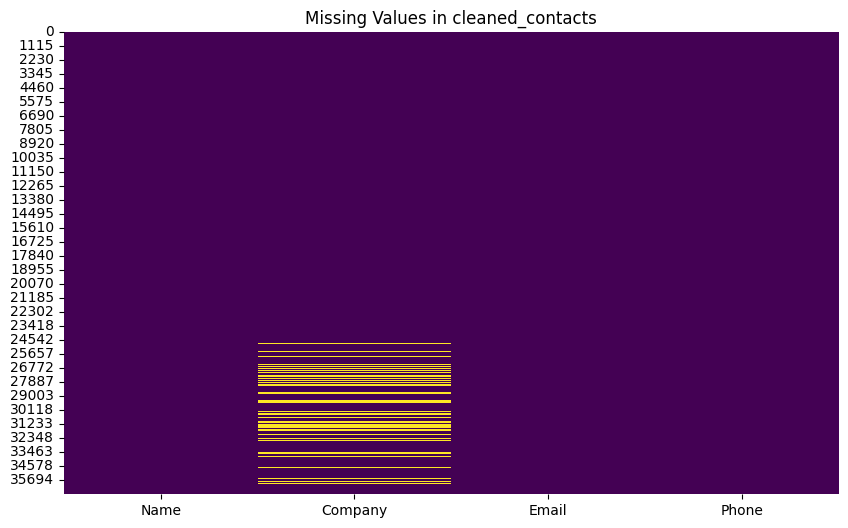

Percentage of missing values per column:
Name       0.002718
Company    9.830674
Email      0.010872
Phone      0.002718
dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Visualize Missing Values
plt.figure(figsize=(10, 6))
sns.heatmap(cleaned_contacts.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in cleaned_contacts')
plt.show()

print("Percentage of missing values per column:")
print(cleaned_contacts.isnull().sum() / len(cleaned_contacts) * 100)

Number of unique companies: 9423


/tmp/ipython-input-2451252745.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies.index, y=top_companies.values, palette='coolwarm')


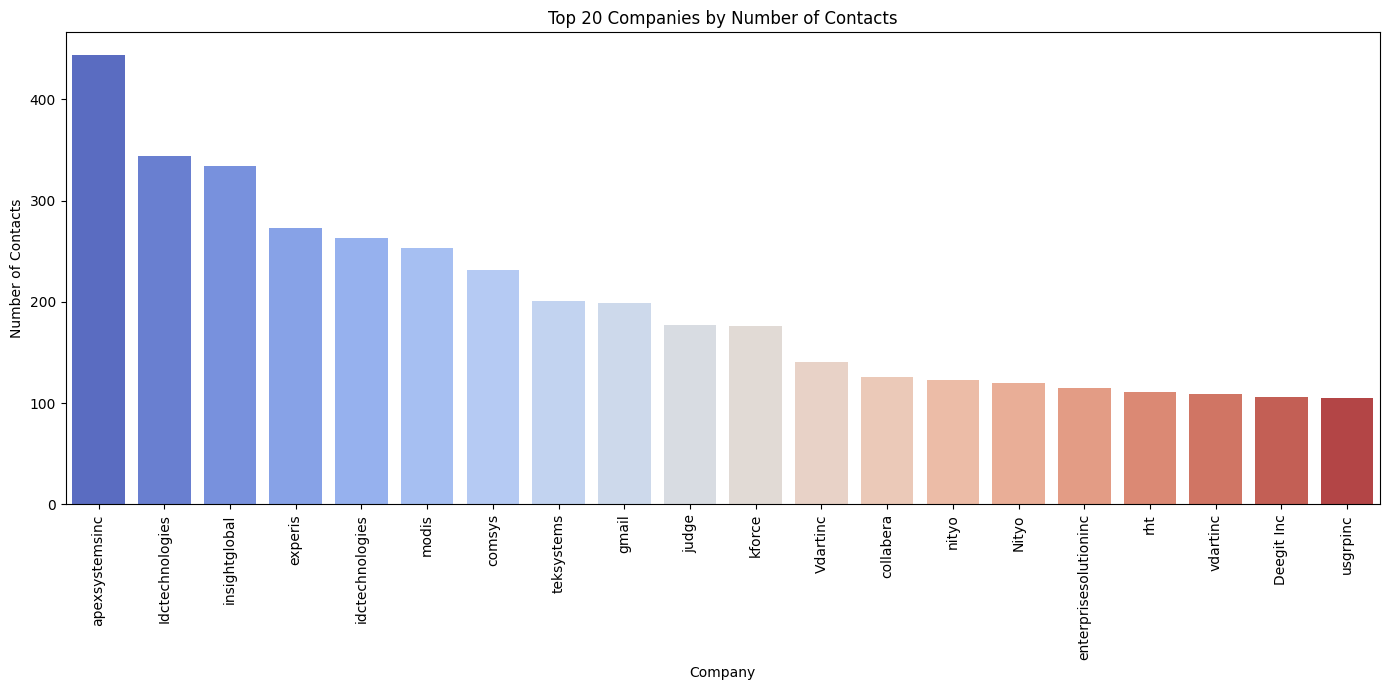

In [ ]:
# 2. Analyze Company Distribution

# Count unique companies
num_unique_companies = cleaned_contacts['Company'].nunique()
print(f"Number of unique companies: {num_unique_companies}")

# Get top N companies by contact count
top_n = 20 # You can adjust this number
top_companies = cleaned_contacts['Company'].value_counts().nlargest(top_n)

plt.figure(figsize=(14, 7))
sns.barplot(x=top_companies.index, y=top_companies.values, palette='coolwarm')
plt.title(f'Top {top_n} Companies by Number of Contacts')
plt.xlabel('Company')
plt.ylabel('Number of Contacts')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

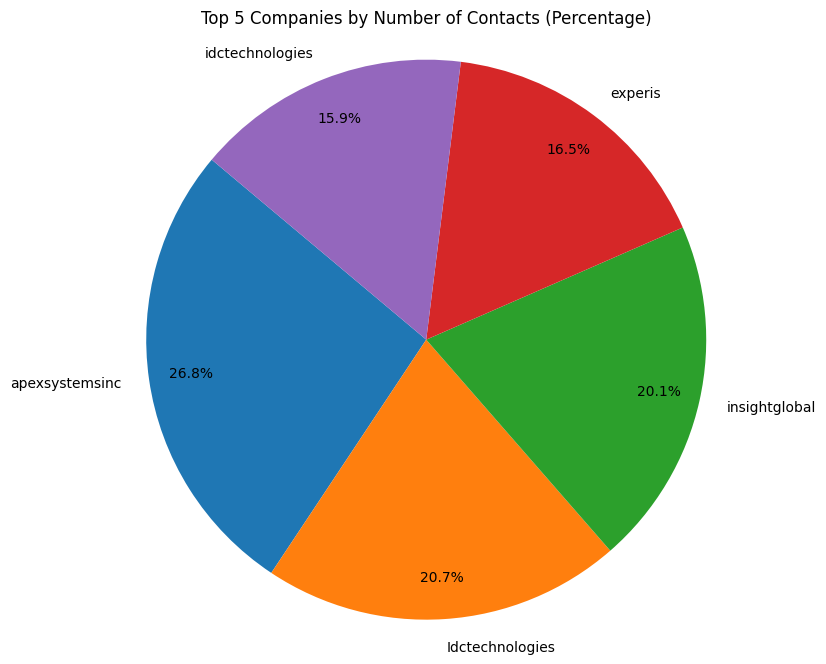

In [ ]:
# Get the top 5 companies for the pie chart
top_5_companies = top_companies.head(5)

plt.figure(figsize=(10, 8))
plt.pie(top_5_companies, labels=top_5_companies.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
plt.title('Top 5 Companies by Number of Contacts (Percentage)')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()